# Review of multivariable calculus

This notebook reviews the needed ideas from multivariable calculus. We will cover

1- Partial Derivatves and gradient

2- Chain Rule

3- Application of the Gradient in Change of Variables

## 1- Partial Derivatives and Gradient

Now we consider the general case where the function $g$ depends more variables. $g$ could represent anything from a physical process to a mathematical relationship. For example, consider $g(x, y)$ that represents the elevation of the a geographic area with respect to sea level at the point on the globe. The generalization of the derivative to functions of several variables is __the gradient, or the Jacobian__. 

A __partial derivative__ of a function with respect to one of its variables measures how the function changes when only that variable changes, while keeping the other variables fixed. 
 
For a function $f:\mathbb{R}^n \to \mathbb{R}, \quad x\mapsto f(x)$ where $x = (x_1,x_2,\dots, x_n)$, we define the partial derivatives as

$$
\begin{align}
\frac{\partial\ f}{\partial x_1} &= \lim\limits_{h\to 0}\dfrac{f(x_1 + h ,x_2,\dots, x_n) - f(x)}{h}\\
\frac{\partial\ f}{\partial x_2} &= \lim\limits_{h\to 0}\dfrac{f(x_1, x_2 +h ,\dots, x_n) - f(x)}{h}\\
& \vdots \\
\frac{\partial\ f}{\partial x_n} &= \lim\limits_{h\to 0}\dfrac{f(x_1, x_2,\dots, x_n + h) - f(x)}{h}\\
\end{align}
$$


In the case of $g(x, y)$, $\frac{\partial g}{\partial x}$ would tell us how the elevation changes as we move east or west, while $\frac{\partial g}{\partial y}$ would tell us how the elevation changes as we move north or south.


The __gradient__ of $f$ at $x = a$, denoted by $(\nabla f)(x)$, is a row vector that collects all partial dereviteves:


$$
(\nabla f)(x) = \left[\frac{\partial\ f}{\partial x_1}, \frac{\partial\ f}{\partial x_2}, \dots, \frac{\partial\ f}{\partial x_n}\right]
$$


As a vector, $(\nabla f)(a)$ is in the direction of __the steepest increase of $f$ at $x = a$,__ and its magnitude, indicates the rate of change of $f$ at the same point. Here _the direction of steepest increase_ mean the direction in which the values of $f$ increases most rapidly as we move away from $x = a$. For example, imagine you are standing on top of a hill. If you start walking in a certain direction, the slope of the hill beneath your feet will determine how quickly you're moving downhill.
 
Mathematically speaking, we view the gradient of a function $(\nabla f)$ as a __vector field__. 

__Example 1:__
    
Let $f(x,y) = e^{cos(xy)} + xy^2 - yx^2$

1- Compute $\frac{\partial f}{\partial x}$, and check your solution using sympy.

2- Compute $\frac{\partial f}{\partial y}$, and check your solution using sympy.

3- compute $\frac{\partial f}{\partial x \partial y}$.

4- compute $\frac{\partial f}{\partial y \partial x}$.

5- compute $\frac{\partial f}{\partial x \partial x \partial y}$.


In [10]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the function
f = sp.exp(sp.cos(x * y)) + x * y**2 - y * x**2



In [11]:
# 1- Find the partial derivatives with respect to x
f_x = sp.diff(f, x)


# Print the partial derivatives
print("Partial derivative with respect to x (df/dx):", f_x)

Partial derivative with respect to x (df/dx): -2*x*y + y**2 - y*exp(cos(x*y))*sin(x*y)


In [12]:
# 2- Find the partial derivatives with respect to y
f_y = sp.diff(f, y)


# Print the partial derivatives
print("Partial derivative with respect to x (df/dy):", f_y)

Partial derivative with respect to x (df/dy): -x**2 + 2*x*y - x*exp(cos(x*y))*sin(x*y)


In [13]:
# 3- Find the mixed partial derivative
f_xy = sp.diff(sp.diff(f, x), y)

# Print the mixed partial derivative
print("Mixed partial derivative (d²f/dx dy):", f_xy)


Mixed partial derivative (d²f/dx dy): x*y*exp(cos(x*y))*sin(x*y)**2 - x*y*exp(cos(x*y))*cos(x*y) - 2*x + 2*y - exp(cos(x*y))*sin(x*y)


In [14]:
# 4- Find the mixed partial derivative
f_yx = sp.diff(sp.diff(f, y), x)

# Print the mixed partial derivative
print("Mixed partial derivative (d²f/dy dx):", f_yx)


Mixed partial derivative (d²f/dy dx): x*y*exp(cos(x*y))*sin(x*y)**2 - x*y*exp(cos(x*y))*cos(x*y) - 2*x + 2*y - exp(cos(x*y))*sin(x*y)


In [15]:
# 5- Find the mixed partial derivative
f_xxy = sp.diff(sp.diff(f, y), x)

# Print the mixed partial derivative
print("Mixed partial derivative (d²f/dy dx):", f_xxy)


Mixed partial derivative (d²f/dy dx): x*y*exp(cos(x*y))*sin(x*y)**2 - x*y*exp(cos(x*y))*cos(x*y) - 2*x + 2*y - exp(cos(x*y))*sin(x*y)


__Example 2:__ Let $f(x,y) = x^2 + 2 \sin(y)$. 

Plot the graph and gradient of $f(x,y) = x^2 + 2 \sin(y)$.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.ticker


# plot a fucntion of two variables
def plot_function(X, Y, fn, linewidth=0):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)


    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


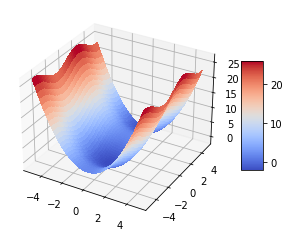

In [17]:
# plug in our function

X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
f = lambda x, y : x**2 + 2 * np.sin(y)

plot_function(X, Y, f)

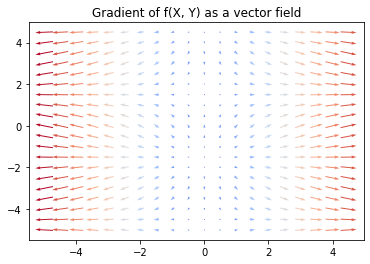

In [18]:
# plot the gradient

Xm, Ym = np.meshgrid(X, Y)
df = lambda x, y : (2 * x, 2 * np.cos(y))
U, V = df(Xm, Ym)

plt.figure()
plt.title('Gradient of f(X, Y) as a vector field')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot = 'mid', cmap = cm.coolwarm)

## Chain Rule



In deep learning, the gradients of concern are often difficult to calculate because we are working with deeply nested functions ($f_0\circ f_1 \circ \dots \circ f_n)$. Fortunately, the chain rule takes care of this. Returning to functions of a single variable, suppose that $u = g(x)$ and $ y = f(u)$ and that the underlying functions $g$ and $f$ are both differentiable. The chain rule states that

$$
\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}
$$

Turning back to multivariate functions, suppose that $y = f(u)$ is a function of $n$ variables $u = (u_1, u_2, \dots, u_m)$ and each variable $u_i = g_i(x)$ is a differentiable of function of $x = (x_1, x_2, \dots, x_n)$. Then the chain rule states that

$$
\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \dots + \frac{\partial y}{\partial u_n} \frac{\partial u_m}{\partial x_i} \quad \text{thus} \quad \nabla_{x}y = A \nabla_{u}y 
$$

where $A$ is an $m\times n$ matrix is the gradient matrix containing the derivative of vector  $u$ with respect to vector $x$. Thus, evaluating the gradient requires computing a vector-matrix product. You can see why linear algebra is such an integral building block in building deep learning systems.

__Example 3:__ 

Let $z = f(u,v)$ and $u = \cos(rs)$, and $v = \sin(r)$. Compute $\frac{df}{dr}$ and $\frac{df}{ds}$.


__Answer:__

$$
\frac{df}{dr} = \ \frac{df}{du}\ \frac{du}{dr}\ \ +\  \ \frac{df}{dv}\ \frac{df}{dr} \ = \ -s\sin(rs)\ \frac{df}{du}\ \ + \ \  \cos(r)\ \frac{df}{dv}
$$

$$
\frac{df}{ds} = \frac{df}{du}\ \frac{dy}{ds}\ \ + \ \ \frac{df}{dv} \ \frac{dv}{ds}\ =\ -r\sin(rs)\frac{df}{du}
$$

## Application of the Gradient in Change of Variables

As we saw before, in the section of linear algebra, the determinant can be used to compute the volume of parallelepiped or area of a parallelogram. The determinant of the Jacobian matrix serves as a magnifier, and when performing transformations, it quantifies how much the volume or area changes. If the determinant is greater than 1, it implies an expansion; if less than 1, a contraction.

We also use it for understanding volume changes during variable transformations in integrals.  

__Example 3__ If we are given two vectors $b_1 = [1,0]^T, b_2 = [0, 1]^T$ as the sides of the unit square, the area of this square is 1. If we take a parallelogram with the sides $c_1 = [−2, 1]^T, c_2 = [1, 1]^T$, its area is given as the absolute value of the determinant

$$
det\begin{bmatrix} -2 & 1\\ 1 & 1\end{bmatrix} = 3
$$

i.e., the area of this is exactly three times the area of the unit square. We can find this scaling factor by finding a linear map that transforms the unit square into the other square. In linear algebra terms, we effectively perform change of basis from $(b_1, b_2)$ to $(c_1, c_2)$. In our case, the mapping is linear and the absolute value of the determinant of this mapping gives us exactly the scaling factor we are looking for. 

Although finding the linear map as a change of basis is easy, we follow a more general approach that works for also non-linear functions using partial derivatives. For this approach, we consider a function $f : \mathbb{R}^2 \to \mathbb{R}^2$ that performs a variable transformation. In our example, f maps the coordinate representation of any vector $x \in \mathbb{R}^2$ with respect to $(b_1,b_2)$ onto the coordinate representation $y\in \mathbb{R}^2$ with respect to $(c_1,c_2)$. We want to identify the mapping so that we can compute how an area (or volume) changes when it is being transformed by f. For this, we need to find out how $f(x)$ changes if we modify $x$ a bit. This question is exactly answered by the Jacobian matrix. Since we can write

$$
\begin{align}
y_1 =& -2 x_1 + x_2\\
y_2 =& x_1 + x_2\\
\end{align}
$$

Computing the partial derivatives, the Jacobian matrix is 

$$
J =\begin{bmatrix} -2 & 1\\ 1 & 1\end{bmatrix} \quad (**)
$$



The Jacobian represents the coordinate transformation we are looking for. It is exact if the coordinate transformation is linear (as in our case), and $(**)$ recovers exactly the basis change matrix. If the coordinate transformation is nonlinear, the Jacobian approximates this non-linear transformation locally with a linear one. The absolute value of the Jacobian determinant $|det(J)|$ is the factor by which areas or volumes are scaled when coordinates are transformed. Our case yields $|det(J)| = 3.$

__Exercise__

1. Plot the graph and gradient of the following functions: 

- $f(x,y) = \sin(x+y)$

- $f(x,y) = e^{x^2+y^2}$

2. Let $z = f(x,y)$ and $x = rs$ and $y = r-s$. Find $\frac{dz}{ds}$, and $\frac{dz}{dr}$

Refrences:
      
  1- https://timothyprojectgig.github.io/JB_Math_Textbook/Undergrad/Calculus/4%20Derivatives.html
  
  2-Mathematics for Machine Learning" by Faisal, A. Aldo; Ong, Cheng Soon; and Deisenroth, Marc Peter, Chapter 2 (Vector Calculus), (2020).